In [6]:
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, f1_score
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Carregar os dados
df = pd.read_csv('dados_preprocessados.csv')

# Selecionar colunas relevantes
features = ['colocacao_mandante', 'colocacao_visitante',
            'media_gols_mandante', 'media_gols_visitante',
            'partidas_jogadas_mandante', 'partidas_jogadas_visitante', 
            'saldo_acumulado_mandante', 'saldo_acumulado_visitante']


In [8]:
# Definir as features (X) e o target (y)
X = df[features]
# 0 para empate, 1 para vitória do mandante, 2 para vitória do visitante
y = np.where(df['gols_mandante'] > df['gols_visitante'], 1, 
             np.where(df['gols_mandante'] < df['gols_visitante'], 2, 0))


In [9]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balanceamento dos dados com RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

In [10]:
# Modelo XGBoost
modelo_xgb = xgb.XGBClassifier(random_state=42)
modelo_xgb.fit(X_train_res, y_train_res)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [11]:
# Fazer previsões no conjunto de teste usando XGBoost
previsoes_xgb = modelo_xgb.predict(X_test)

In [12]:
# Avaliar a precisão, acurácia, sensibilidade e F1-score do modelo XGBoost
acuracia_xgb = accuracy_score(y_test, previsoes_xgb)
precisao_xgb = precision_score(y_test, previsoes_xgb, average=None)
sensibilidade_xgb = recall_score(y_test, previsoes_xgb, average=None)
f1_scores_xgb = f1_score(y_test, previsoes_xgb, average=None)

In [13]:
print("Acurácia do modelo XGBoost:", acuracia_xgb)
print("Precisão para cada classe (Empate, Vitória mandante, Vitória visitante):", precisao_xgb)
print("Sensibilidade para cada classe (Empate, Vitória mandante, Vitória visitante):", sensibilidade_xgb)
print("F1-Score para cada classe (Empate, Vitória mandante, Vitória visitante):", f1_scores_xgb)



Acurácia do modelo XGBoost: 0.49153976311336717
Precisão para cada classe (Empate, Vitória mandante, Vitória visitante): [0.30790191 0.69330454 0.41761364]
Sensibilidade para cada classe (Empate, Vitória mandante, Vitória visitante): [0.36217949 0.5394958  0.53454545]
F1-Score para cada classe (Empate, Vitória mandante, Vitória visitante): [0.33284242 0.60680529 0.46889952]


In [14]:
# Imprimir relatório de classificação para XGBoost
print("Relatório de classificação do modelo XGBoost:")
print(classification_report(y_test, previsoes_xgb, target_names=['Empate', 'Vitória mandante', 'Vitória visitante']))

Relatório de classificação do modelo XGBoost:
                   precision    recall  f1-score   support

           Empate       0.31      0.36      0.33       312
 Vitória mandante       0.69      0.54      0.61       595
Vitória visitante       0.42      0.53      0.47       275

         accuracy                           0.49      1182
        macro avg       0.47      0.48      0.47      1182
     weighted avg       0.53      0.49      0.50      1182



In [15]:
# Imprimir relatório de classificação para XGBoost
print("Relatório de classificação do modelo XGBoost:")
print(classification_report(y_test, previsoes_xgb, target_names=['Empate', 'Vitória mandante', 'Vitória visitante']))



Relatório de classificação do modelo XGBoost:
                   precision    recall  f1-score   support

           Empate       0.31      0.36      0.33       312
 Vitória mandante       0.69      0.54      0.61       595
Vitória visitante       0.42      0.53      0.47       275

         accuracy                           0.49      1182
        macro avg       0.47      0.48      0.47      1182
     weighted avg       0.53      0.49      0.50      1182



In [17]:
# Modelo LightGBM
modelo_lgb = lgb.LGBMClassifier(random_state=42)
modelo_lgb.fit(X_train_res, y_train_res)

# Fazer previsões no conjunto de teste usando LightGBM
previsoes_lgb = modelo_lgb.predict(X_test)

# Avaliar a precisão, acurácia, sensibilidade e F1-score do modelo LightGBM
acuracia_lgb = accuracy_score(y_test, previsoes_lgb)
precisao_lgb = precision_score(y_test, previsoes_lgb, average=None)
sensibilidade_lgb = recall_score(y_test, previsoes_lgb, average=None)
f1_scores_lgb = f1_score(y_test, previsoes_lgb, average=None)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 3345, number of used features: 8
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


In [18]:
print("Acurácia do modelo LightGBM:", acuracia_lgb)
print("Precisão para cada classe (Empate, Vitória mandante, Vitória visitante):", precisao_lgb)
print("Sensibilidade para cada classe (Empate, Vitória mandante, Vitória visitante):", sensibilidade_lgb)
print("F1-Score para cada classe (Empate, Vitória mandante, Vitória visitante):", f1_scores_lgb)


Acurácia do modelo LightGBM: 0.5093062605752962
Precisão para cada classe (Empate, Vitória mandante, Vitória visitante): [0.31896552 0.69690722 0.43839542]
Sensibilidade para cada classe (Empate, Vitória mandante, Vitória visitante): [0.35576923 0.56806723 0.55636364]
F1-Score para cada classe (Empate, Vitória mandante, Vitória visitante): [0.33636364 0.62592593 0.49038462]


In [19]:
# Imprimir relatório de classificação para LightGBM
print("Relatório de classificação do modelo LightGBM:")
print(classification_report(y_test, previsoes_lgb, target_names=['Empate', 'Vitória mandante', 'Vitória visitante']))

Relatório de classificação do modelo LightGBM:
                   precision    recall  f1-score   support

           Empate       0.32      0.36      0.34       312
 Vitória mandante       0.70      0.57      0.63       595
Vitória visitante       0.44      0.56      0.49       275

         accuracy                           0.51      1182
        macro avg       0.48      0.49      0.48      1182
     weighted avg       0.54      0.51      0.52      1182



In [ ]:
# Função para plotar a matriz de confusão
def plot_confusion_matrix(y_test, previsoes, model_name):
    conf_matrix = confusion_matrix(y_test, previsoes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Empate', 'Vitória Mandante', 'Vitória Visitante'], yticklabels=['Empate', 'Vitória Mandante', 'Vitória Visitante'])
    plt.xlabel('Previsões')
    plt.ylabel('Verdadeiros')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()


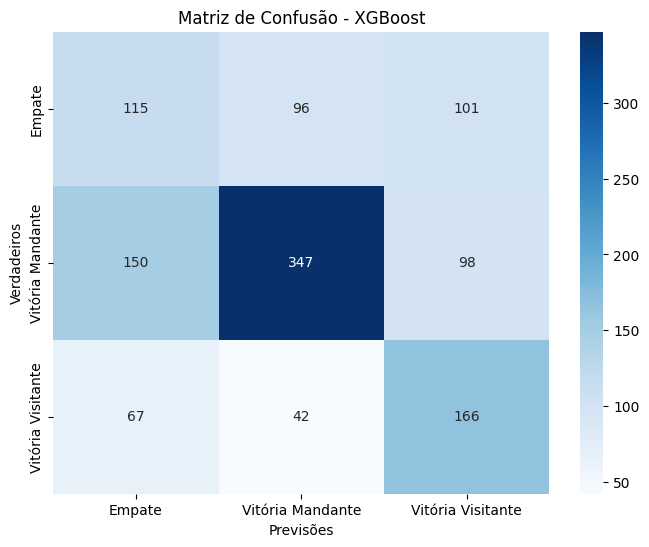

In [ ]:

# Matriz de confusão para XGBoost
plot_confusion_matrix(y_test, previsoes_xgb, 'XGBoost')


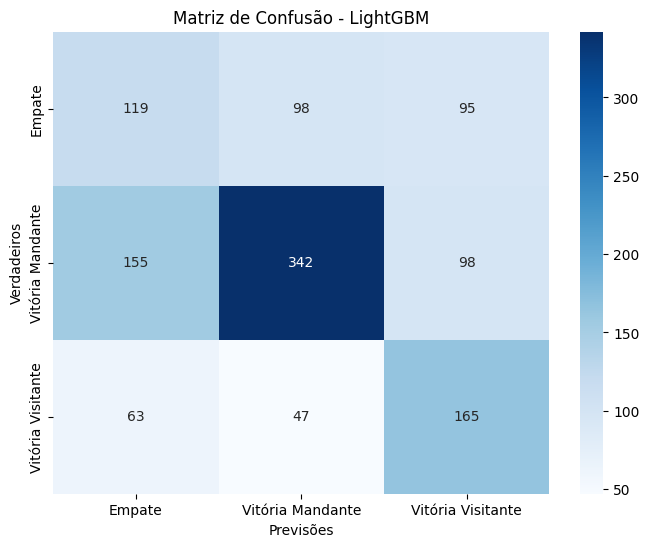

In [ ]:
# Matriz de confusão para LightGBM
plot_confusion_matrix(y_test, previsoes_lgb, 'LightGBM')